### In this notebook we work with the IRIS dataset to implement a ML model and then apply hyperparameter tuning  in order to find the hyperparameters that yield the best accuracy.

We'll use the iris dataset:https://archive.ics.uci.edu/ml/datasets/iris


In [ ]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

--2022-08-22 20:03:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘iris.data’

iris.data           100%[===================>]   4.44K  --.-KB/s    in 0s      

2022-08-22 20:03:38 (104 MB/s) - ‘iris.data’ saved [4551/4551]



In [ ]:
#import the dataset using pd.read_csv()
header_list = [ "SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"]
df = pd.read_csv('/content/iris.data', names=header_list)

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Convert categorical values for the column "species" to numerical values.

In [ ]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#create a dictionary with target variable categorical values and their corresponding numerical features


# use .map() to map the dictionary values onto the column 'species'
df.Species = df.Species.map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#check our your dataframe using .head()

#### Split your dataframe to features "X" and output "y"

In [ ]:
#drop the 'species' column from your original dataframe. Your new X dataframe should contain only features X 
X=df.drop('Species',axis=1)

# select the 'species' column from your original dataframe. Your new y dataframe should contain the output y
y=df['Species']


In [ ]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Let's visualize our features

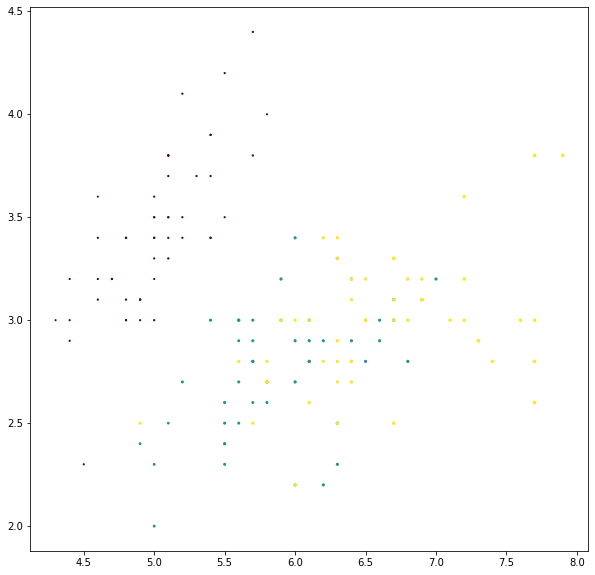

In [ ]:
plt.subplots(figsize=(10, 10))
plt.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=y)
plt.show()

#### Split our data into training and testing 

In [ ]:
#import train_test_split library
from sklearn.model_selection import train_test_split
#split our data
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#### Choose a model and train it and then predict, let's try using Decision Tree Classifier

In [ ]:
#import our model from sklearn
from sklearn.tree import DecisionTreeClassifier
#initialize our model
clf = DecisionTreeClassifier()
#fit our model
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
# create a new variable that contains all the predicted values for our train set
y_pred_train= clf.predict(x_train)

# create a new variable that contains all the predicted values for our test set
y_pred_test= clf.predict(x_test)

#### Evaluate how well our model did on the train set and on the test set

In [ ]:
#import your choice of evaluation metric from sklearn.metrics
from sklearn.metrics import accuracy_score 

#calculate the evaluation for the train set
accuracy_train= accuracy_score(y_train,y_pred_train)

#calculate the evaluation for the test set
accuracy_test= accuracy_score(y_test,y_pred_test)


print("Accuracy score for training set is {}.".format(accuracy_train))
print("Accuracy score for test set is {}.".format(accuracy_test))

Accuracy score for training set is 1.0.
Accuracy score for test set is 0.9333333333333333.


#### Implementing Hyperparameter Tuning

##### Let's take a look at some of our hyperparameters for the DecisionTreeClassifier in scikit learn:
1. criterion ---> {“gini”, “entropy”}, default=”gini”
    The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

2. splitter ---> {“best”, “random”}, default=”best”
    The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” 
    to choose the best random split.

3. max_depth --->
   The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain
   less than min_samples_split samples.

4. min_samples_split ---> The minimum number of samples required to split an internal node

You can also refer to the documentation to know more: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier


In [ ]:
# Import Grid Search from Sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer  
# Initialize your classifier

clf1 = DecisionTreeClassifier()
scorer = make_scorer(accuracy_score)
#create a dictionary with the hyperparameters you want to choose from
parameters = { 'max_depth':list(range(2,50)),
              'min_samples_split':list(range(2,50)),
              'min_samples_leaf':list(range(2,50))} 


#apply GridSearchCV to your classifier and parameters
grid_obj = GridSearchCV(clf1,parameters,scoring= scorer)
 
# fit the model for grid search
grid = grid_obj.fit(x_train,y_train)

KeyboardInterrupt: ignored

#### Find the best parameters and the best score

In [ ]:

# print best parameter after tuning
print("The best parameters for tuning our model {}".format(grid.best_params_))
 
# print how our model looks after hyper-parameter tuning
print("Our best model: {}".format(grid.best_estimator_))

#print the highest score
print("Highest score: {}".format(grid.best_score_))

The best parameters for tuning our model {'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 4}
Our best model: DecisionTreeClassifier(max_depth=4, min_samples_leaf=3, min_samples_split=4)
Highest score: 0.9666666666666668


In [ ]:
# Import Randomized Search from Sklearn
from sklearn.model_selection import RandomizedSearchCV

# Initialize your classifier
clf2 = DecisionTreeClassifier()


#create a dictionary with the hyperparameters you want to choose from
parameters = {'max_depth':range(2,20),
              'min_samples_split':range(2,10),
              'min_samples_leaf':range(1,10) }


#apply RandomizedSearchCV to your classifier and parameters
rand_obj = RandomizedSearchCV(clf2,parameters,scoring=scorer)

 
# fit the model for your randomized search
rand = rand_obj.fit(x_train,y_train)


#### Find the best parameters and the best score

In [ ]:

# print best parameter after tuning
print("The best parameters for tuning our model {}".format(rand.best_params_))
 
# print how our model looks after hyper-parameter tuning
print("Our best model: {}".format(rand.best_estimator_))

#print the highest score
print("Highest score: {}".format(rand.best_score_))

The best parameters for tuning our model {'min_samples_split': 6, 'min_samples_leaf': 3, 'max_depth': 10}
Our best model: DecisionTreeClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=6)
Highest score: 0.9666666666666668


#### Which do you think is the better method for hyperparameter tuning? Are there better methods for tunning our hyperparameters? 